# Example 2. Regularization methods
---

The overfitting is the common problem in machine learning. The learned weights (coefficeint parameters) sometimes over-emphasize some variable, which make the model overfit the data. To avoid this problem, we usually add the **regularization** term in **cost function**. The regularization is formed by the weights in oreder to belance the cost and smooth the learned model. Two usual regularization terms **L1** and **L2** method. The defination of the **L1** term is 

$$
\begin{equation}
L_1=||W||_1=\sum_{i}{|w_i|}
\end{equation}
$$

The difination of **L2** term is

$$
\begin{equation}
L_2=||W||^2_2=W^TW=\sum_{i}{w_i^2}
\end{equation}
$$

When adding one of both $L_i$ to cost function $f$, they will make the weights performing different solution. To control the strength of regularization, we usually add the regularization parameter in front of regularization term, defined **$\lambda$** as 

$$
\begin{equation}
\begin{split}
f' &= f + \epsilon \\
&= f + \lambda L_i,\ i=1, 2
\end{split}
\end{equation}
$$

where $f'$ is the new cost function with adding regularization term $\epsilon=\lambda L_i$; $\epsilon$ represents a hyperplane in the space of $w_i$ which has an overlapping region with $f$, where *f* has a local minimum we are interested. The minimum of regularization hyperplane is in the origin of the space. If we move $\lambda$ to the side of $\epsilon$, it can be redifined to $C=1/\lambda$ which becomes a parameter of the **intercept of L1** as and the **radius of L2**. For instance of 2D variables case, they becomes 

$$
\begin{equation}
\left|w_1\right|+\left|w_2\right|=C\epsilon
\end{equation}
$$

and

$$
\begin{equation}
w_1^2+w_2^2=C\epsilon
\end{equation}
$$

With the proper $\lambda$ value, **L1** perfom much **sparse** solution than **L2** due the different shape of its hyperplane in the space of $w_i$. **Sparse** means some wieghts are zero and reducing the dimenson of variables, which is a way to conservate the model complexity.

### Import class and data
Wine data is used for the exercises.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_wine = pd.read_csv('wine.data')
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                   'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanolds', 
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
                   'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanolds,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
print 'Class labels: ', np.unique(df_wine['Class label'])

Class labels:  [1 2 3]


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [6]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Sparse comparison

In [7]:
from sklearn.linear_model import LogisticRegression

### 1. L1 regularization

In [8]:
lr1 = LogisticRegression(penalty='l1', C=0.1)
lr1.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
print 'Training accuracy:', lr1.score(X_train_std, y_train)
print 'Test accuracy:', lr1.score(X_test_std, y_test)

Training accuracy: 0.975609756098
Test accuracy: 0.981481481481


In [10]:
lr1.intercept_

array([-0.39574054, -0.07929056, -0.72035947])

In [11]:
lr1.coef_

array([[ 0.34980161,  0.        ,  0.        , -0.09749246,  0.        ,
         0.        ,  0.46681054,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10708894,  1.26838731],
       [-0.72605267, -0.1058821 , -0.14610309,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.91536004,
         0.        ,  0.        , -0.27565333],
       [ 0.        ,  0.07541256,  0.        ,  0.        ,  0.        ,
         0.        , -0.75492569,  0.        ,  0.        ,  0.56999516,
        -0.35592303, -0.37984866,  0.        ]])

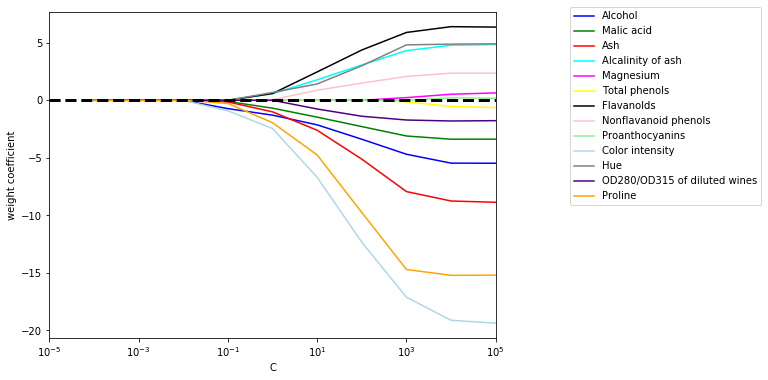

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot( params, 
              weights[:, column], 
              label=df_wine.columns[column+1],
              color=color )
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, 
          fancybox=True)
plt.show()
             

### 2. L2 regularization

In [13]:
lr2 = LogisticRegression(penalty='l2', C=0.1)
lr2.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
print 'Training accuracy:', lr2.score(X_train_std, y_train)
print 'Test accuracy:', lr2.score(X_test_std, y_test)

Training accuracy: 0.991869918699
Test accuracy: 1.0


In [15]:
lr2.intercept_

array([-0.67087814, -0.38881865, -0.86085792])

In [16]:
lr2.coef_

array([[ 0.63242374,  0.07059446,  0.33853008, -0.57407123,  0.11156882,
         0.20039906,  0.37904005, -0.10982635,  0.09124294,  0.10764871,
         0.13849287,  0.40482643,  0.78584403],
       [-0.75565835, -0.34594052, -0.48837552,  0.31780329, -0.16169861,
         0.03178996,  0.15582916,  0.00502587,  0.13495688, -0.73475079,
         0.35608038,  0.07367636, -0.68389476],
       [ 0.16750425,  0.30925275,  0.16640323,  0.22691372,  0.04850216,
        -0.22632273, -0.51742947,  0.12235681, -0.22169128,  0.65515331,
        -0.48200778, -0.47327649, -0.06506674]])

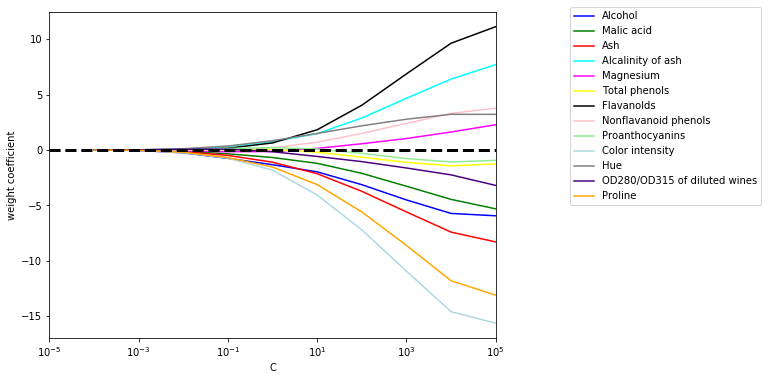

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l2', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot( params, 
              weights[:, column], 
              label=df_wine.columns[column+1],
              color=color )
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, 
          fancybox=True)
plt.show()
             

Where C is $1/\lambda$, $\lambda$ is the strength parameter of regularization. Thus, when C is smaller, i.e. the strength of regularization term is stronger, the regularization in cost function play a significant role. To minimizing the cost function, the weights will be closs to zero. Comparing between **L1** and **L2**, you can observe the sparse behavior in L1 in the region of C arround $C=10^{-1}$, where some of weights are zero. The behavior sometime is very helpful for sparse the feature of neuron in Neural Network algorithm. 